In [144]:
import numpy as np
import matplotlib.pyplot as plt

We will do classification in 2D

In [145]:
#generate data
mean1 = [10,10]
mean2 = [5,5]

cov1 = [[1,-0.3],[-0.3,1]]
cov2 = [[1,-0.3],[-0.3,1]]

x1 = np.random.multivariate_normal(mean1, cov1,size = 100)
x2 = np.random.multivariate_normal(mean2, cov1,size = 100)

y = np.append(np.zeros(100),np.ones(100))
x = np.vstack((x2,x1))

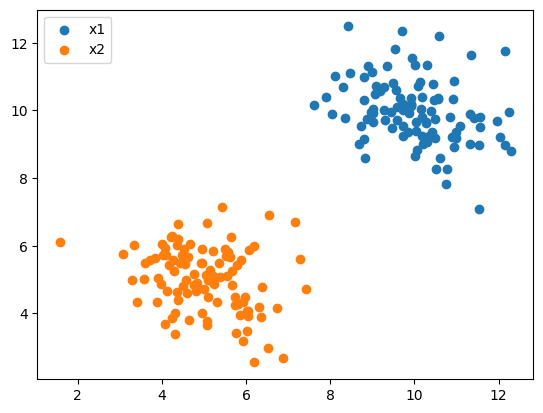

In [146]:
#plot data
plt.scatter(x1[:,0],x1[:,1],label = 'x1')
plt.scatter(x2[:,0],x2[:,1],label = 'x2')
plt.legend()
plt.show()

Since our data is in $\mathbb{R}^2$ our feature map function will be $\phi(x_1,x_2) = w_1*x_1 + w_2*x_2 + b $

In [147]:
#Use logistic function as out model
def Model(x,w1,w2,b):
    z = w1 * x[:,0] + w2*x[:,1] + b
    return 1/(1 + np.exp(-z))

The Log likelihood function for this problem is $l(w) = \sum^n_{i=1}y\log(h(w;x)) + (1-y)\log(1-h(w;x))$ where h is the logistic function
So maximizing $l(w)$ is equivalent to minimizing $-l(w)$ or we can use gradient ascent which is $w = w + lr*\frac{\partial l(w)}{\partial w}$ to find $w$ that maximize $l(w)$

In [148]:
def Loss(x,w1,w2,b,y):
    l = np.sum( y * np.log(Model(x,w1,w2,b)) + (1-y) * np.log(1 - Model(x,w1,w2,b)))
    return -l

def dLoss_w1(x,w1,w2,b,y):
    return -np.sum((y - Model(x,w1,w2,b)) * x[:,0])

def dLoss_w2(x,w1,w2,b,y):
    return -np.sum((y - Model(x,w1,w2,b)) * x[:,1])

def dLoss_b(x,w1,w2,b,y):
    return -np.sum((y - Model(x,w1,w2,b)))


Let $g(z)$ be a sigmoid function, then $g'(z) = g(z)(1-g(z))$
Let $l(\theta)$ be the loss function above, then $\frac{\partial}{\partial \theta_j}l(\theta) = (y - h_\theta(x))x_j$
Put them togather, we will get the desired Loss and its partial derivatives.

In [169]:
def train(epoches,lr,x,y):
    w1,w2,b = [1,1,0]
    for epoch in range(epoches):
        loss = Loss(x, w1, w2, b, y)

        w1 -= lr * dLoss_w1(x, w1, w2, b, y)
        w2 -= lr * dLoss_w2(x, w1, w2, b, y)
        b -= lr * dLoss_b(x, w1, w2, b, y)

        if epoch % 10 == 0:
            print('epoch: %d, Loss: %.2f' %(epoch,loss))

    return w1,w2,b

Here the loss is the negative of log likelihood function. So finding the minimum is equivalent to maximize the likelihood function.

In [191]:
epoches = 5000
learning_rate = 3e-3
w1,w2,b = train(epoches,learning_rate,x,y)

epoch: 0, Loss: 1004.17
epoch: 10, Loss: 124.50
epoch: 20, Loss: 410.72
epoch: 30, Loss: 274.88
epoch: 40, Loss: 63.71
epoch: 50, Loss: 161.05
epoch: 60, Loss: 369.55
epoch: 70, Loss: 291.94
epoch: 80, Loss: 844.64
epoch: 90, Loss: 790.67
epoch: 100, Loss: 576.86
epoch: 110, Loss: 279.61
epoch: 120, Loss: 170.05
epoch: 130, Loss: 69.04
epoch: 140, Loss: 42.81
epoch: 150, Loss: 10.26
epoch: 160, Loss: 9.78
epoch: 170, Loss: 9.54
epoch: 180, Loss: 9.36
epoch: 190, Loss: 9.19
epoch: 200, Loss: 9.02
epoch: 210, Loss: 8.87
epoch: 220, Loss: 8.71
epoch: 230, Loss: 8.57
epoch: 240, Loss: 8.43
epoch: 250, Loss: 8.30
epoch: 260, Loss: 8.17
epoch: 270, Loss: 8.04
epoch: 280, Loss: 7.92
epoch: 290, Loss: 7.80
epoch: 300, Loss: 7.69
epoch: 310, Loss: 7.58
epoch: 320, Loss: 7.47
epoch: 330, Loss: 7.37
epoch: 340, Loss: 7.27
epoch: 350, Loss: 7.17
epoch: 360, Loss: 7.08
epoch: 370, Loss: 6.99
epoch: 380, Loss: 6.90
epoch: 390, Loss: 6.81
epoch: 400, Loss: 6.73
epoch: 410, Loss: 6.64
epoch: 420, Loss

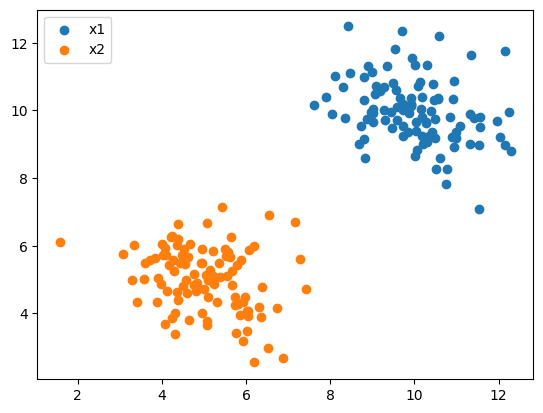

In [192]:
#plot the result and boundary
plt.scatter(x1[:,0],x1[:,1],label = 'x1')
plt.scatter(x2[:,0],x2[:,1],label = 'x2')
plt.legend()
plt.show()
